In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
scaler = StandardScaler()

In [4]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mae'])

In [8]:
batch_size = 32
epochs = 100
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 20s 795ms/step - loss: 583.5929 - mae: 22.1930 - val_loss: 649.9418 - val_mae: 23.4596
Epoch 2/100
9/9 [==============================] - 5s 602ms/step - loss: 523.4177 - mae: 20.8392 - val_loss: 580.4589 - val_mae: 22.0345
Epoch 3/100
9/9 [==============================] - 2s 234ms/step - loss: 459.2091 - mae: 19.2941 - val_loss: 499.4499 - val_mae: 20.2217
Epoch 4/100
9/9 [==============================] - 2s 236ms/step - loss: 383.0315 - mae: 17.3069 - val_loss: 400.5557 - val_mae: 17.8117
Epoch 5/100
9/9 [==============================] - 2s 229ms/step - loss: 296.0552 - mae: 14.8373 - val_loss: 291.7882 - val_mae: 14.8730
Epoch 6/100
9/9 [==============================] - 2s 230ms/step - loss: 206.7503 - mae: 11.9339 - val_loss: 187.6485 - val_mae: 11.4932
Epoch 7/100
9/9 [==============================] - 2s 224ms/step - loss: 133.2799 - mae: 9.2315 - val_loss: 110.1264 - val_mae: 8.4781
Epoch 8/100
9/9 [=========================

9/9 [==============================] - 2s 225ms/step - loss: 10.6021 - mae: 2.2470 - val_loss: 11.5169 - val_mae: 2.7249
Epoch 63/100
9/9 [==============================] - 2s 229ms/step - loss: 10.2723 - mae: 2.2218 - val_loss: 11.6945 - val_mae: 2.7160
Epoch 64/100
9/9 [==============================] - 2s 229ms/step - loss: 10.1775 - mae: 2.2067 - val_loss: 11.3655 - val_mae: 2.6548
Epoch 65/100
9/9 [==============================] - 2s 233ms/step - loss: 10.0743 - mae: 2.1818 - val_loss: 10.7892 - val_mae: 2.5939
Epoch 66/100
9/9 [==============================] - 2s 228ms/step - loss: 10.0666 - mae: 2.1565 - val_loss: 10.6079 - val_mae: 2.6066
Epoch 67/100
9/9 [==============================] - 2s 223ms/step - loss: 9.9656 - mae: 2.1999 - val_loss: 11.3466 - val_mae: 2.6866
Epoch 68/100
9/9 [==============================] - 2s 224ms/step - loss: 9.8319 - mae: 2.1982 - val_loss: 11.6684 - val_mae: 2.6955
Epoch 69/100
9/9 [==============================] - 2s 227ms/step - loss: 9.7

In [9]:
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

4/4 [==============================] - 2s 3ms/step - loss: 22.1762 - mae: 2.9202
Test Loss: [22.17617416381836, 2.9202380180358887]


In [10]:
predictions = model.predict(x_test)

4/4 [==============================] - 6s 6ms/step


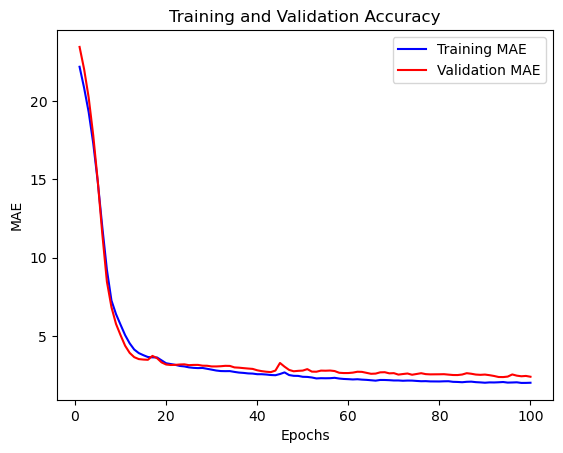

In [11]:
train_accuracy = history.history['mae']
val_accuracy = history.history['val_mae']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training MAE')
plt.plot(epochs, val_accuracy, 'r', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 2.920238465888828
